In [2]:
import pandas as pd
import numpy as np
import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

We start by loading the data and setting the index column. We then find the number of observations to be 450.

In [3]:
data = pd.read_csv('project1_data.csv', delimiter=';', index_col='id')

In [4]:
data.head()

,weight,height,sex,cats,age,income,savings,single,place,expenses
id,,,,,,,,,,
1,84.99,171.72,1,2,55,1213.10,480.45,0,1,326.33
2,91.06,175.83,1,2,41,1300.14,192.14,0,2,409.24
3,88.30,175.34,1,1,42,1203.19,643.34,0,3,274.26
4,84.51,167.64,1,1,50,1231.13,303.35,0,1,374.86
5,85.72,171.62,1,2,53,892.02,424.99,0,2,248.24


In [5]:
data.describe()

,weight,height,sex,cats,age,income,savings,single,place,expenses
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,89.477667,177.277267,1.488889,2.035556,50.613333,1592.097733,620.030667,0.364444,2.046667,308.810178
std,3.600803,7.918122,0.500433,1.372195,6.847808,940.605357,415.998130,0.481810,0.721944,126.167312
min,77.890000,158.670000,1.000000,0.000000,34.000000,691.730000,85.800000,0.000000,1.000000,-391.650000
25%,86.830000,170.755000,1.000000,1.000000,46.000000,1051.787500,387.605000,0.000000,2.000000,236.567500
50%,89.420000,176.635000,1.000000,2.000000,51.000000,1281.810000,560.415000,0.000000,2.000000,336.990000
75%,92.030000,183.935000,2.000000,3.000000,55.000000,1799.727500,733.565000,1.000000,3.000000,407.227500
max,99.720000,195.790000,2.000000,5.000000,73.000000,7089.020000,3200.920000,1.000000,3.000000,486.790000


We then divide the columns into quantitative and qualitative. The latter ones are sex, single and place. The sex and single columns have two possible values indicating whether a person is a female/lives alone. The place variable describes where the person lives and the values are not indicating anything more than that.

In [6]:
quantitative_cols = [
    'weight',
    'height',
    'cats',
    'age',
    'income',
    'savings',
    'expenses'
]
qualitative_cols = [
    'sex',
    'single',
    'place'
]

We do not have any missing values.

In [7]:
data.isna().sum()

weight      0
height      0
sex         0
cats        0
age         0
income      0
savings     0
single      0
place       0
expenses    0
dtype: int64

In [8]:
data[quantitative_cols].describe()

,weight,height,cats,age,income,savings,expenses
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,89.477667,177.277267,2.035556,50.613333,1592.097733,620.030667,308.810178
std,3.600803,7.918122,1.372195,6.847808,940.605357,415.998130,126.167312
min,77.890000,158.670000,0.000000,34.000000,691.730000,85.800000,-391.650000
25%,86.830000,170.755000,1.000000,46.000000,1051.787500,387.605000,236.567500
50%,89.420000,176.635000,2.000000,51.000000,1281.810000,560.415000,336.990000
75%,92.030000,183.935000,3.000000,55.000000,1799.727500,733.565000,407.227500
max,99.720000,195.790000,5.000000,73.000000,7089.020000,3200.920000,486.790000


In [9]:
for col in qualitative_cols:
    display(data[col].value_counts())

sex
1    230
2    220
Name: count, dtype: int64

single
0    286
1    164
Name: count, dtype: int64

place
2    215
3    128
1    107
Name: count, dtype: int64

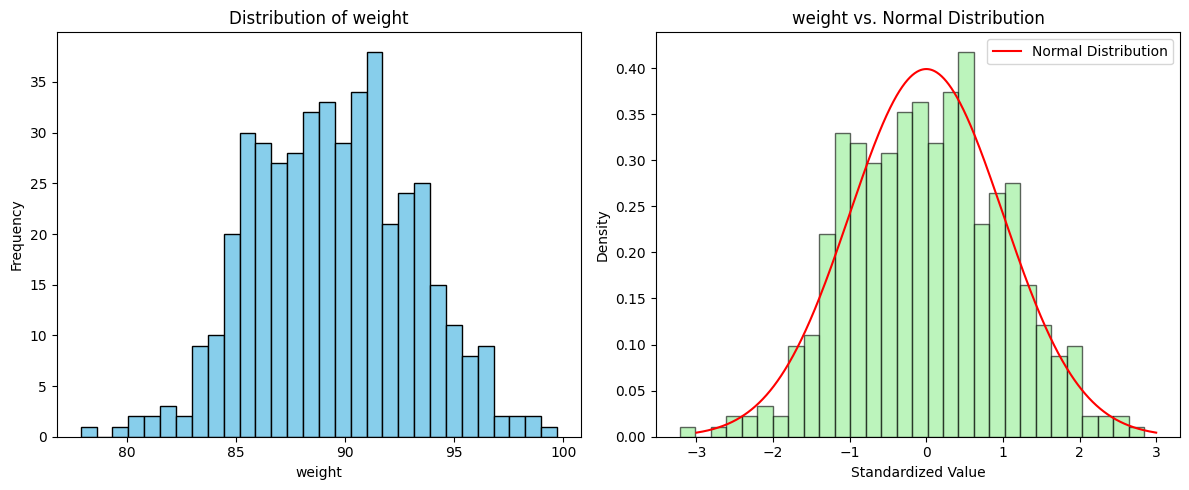

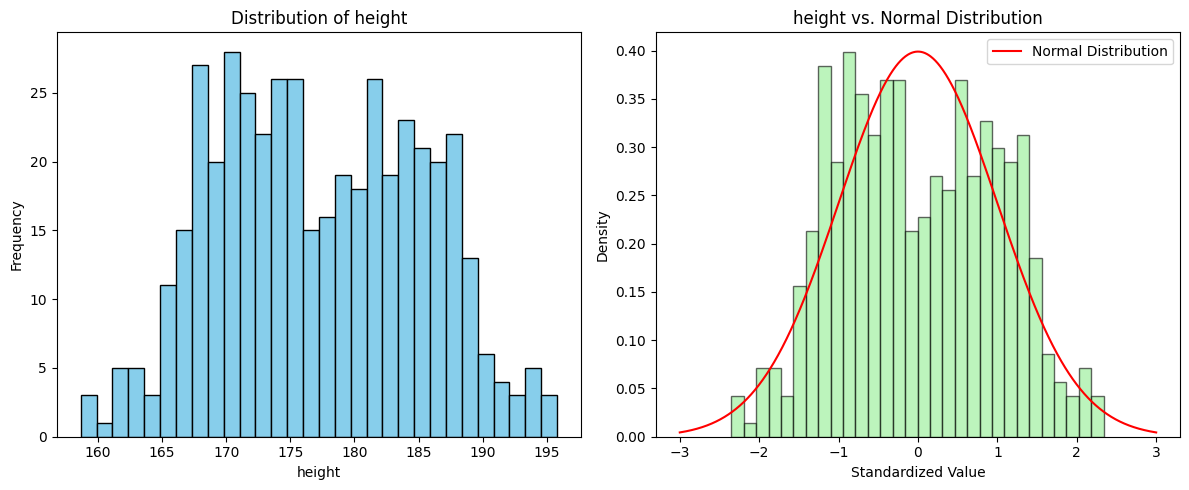

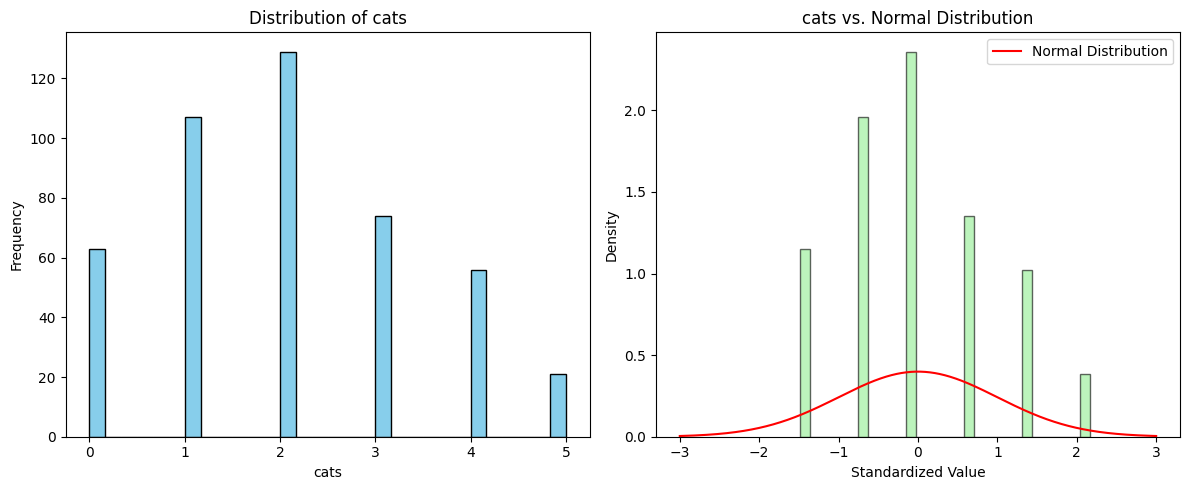

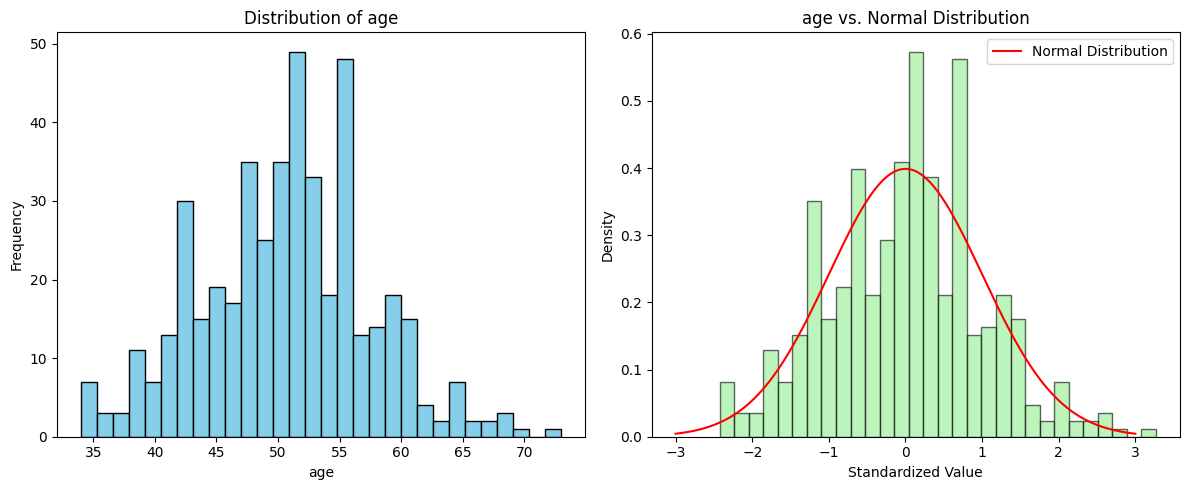

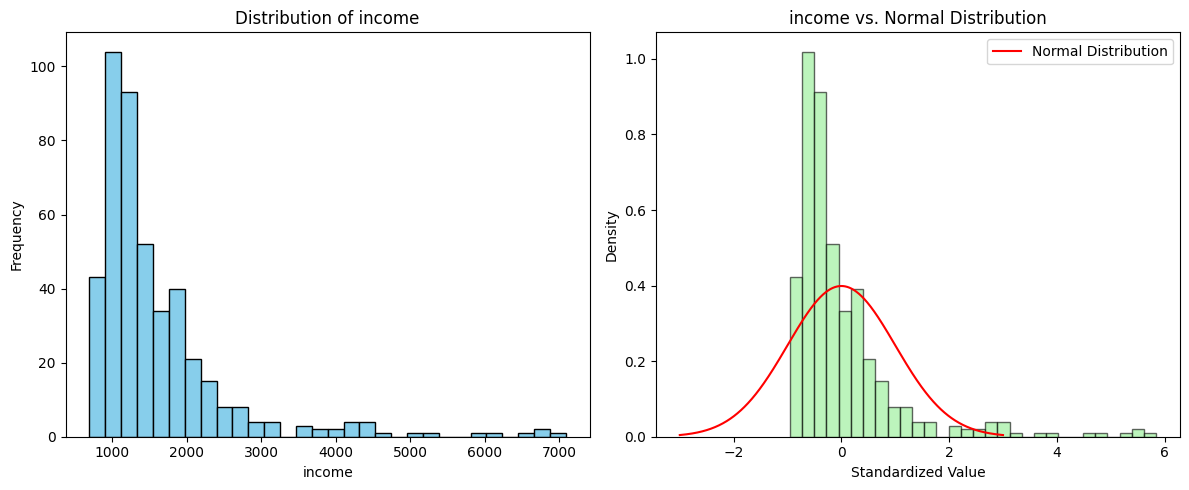

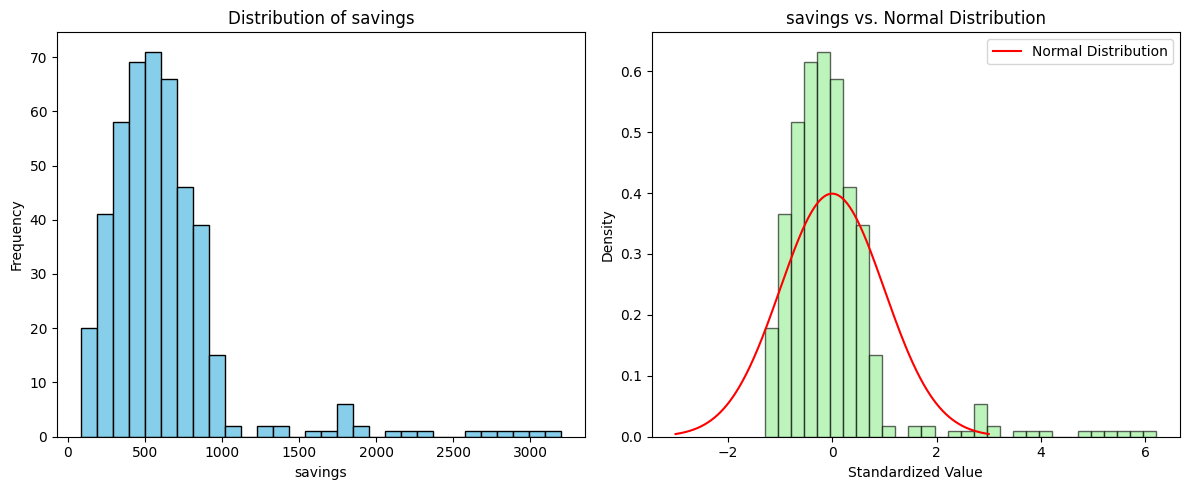

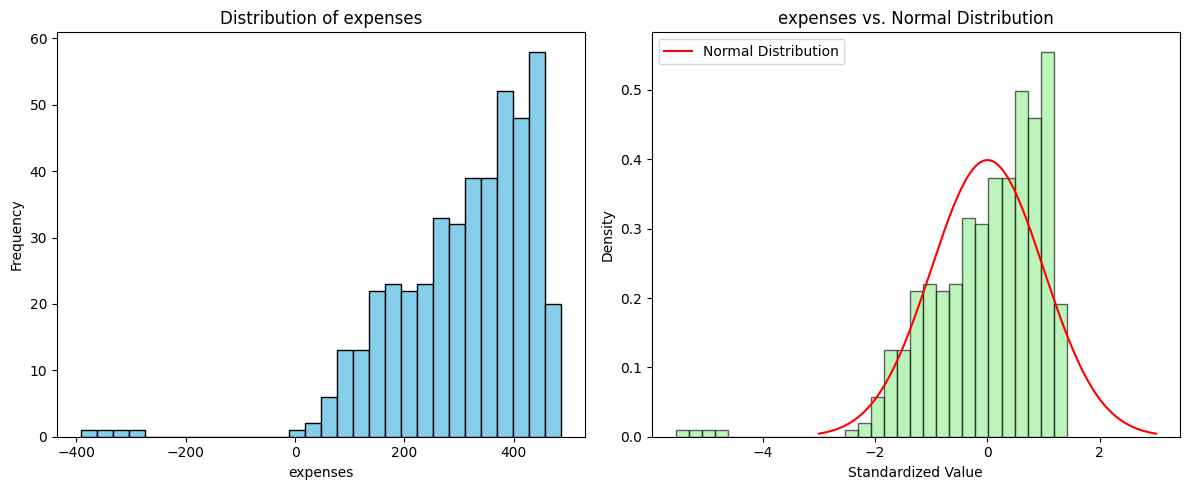

In [10]:
from scipy.stats import norm

for col in quantitative_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  
    ax[0].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    ax[0].set_title(f'Distribution of {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')

    normalized_data = (data[col] - data[col].mean()) / data[col].std()
    ax[1].hist(normalized_data, bins=30, density=True, alpha=0.6, color='lightgreen', edgecolor='black')
    x = np.linspace(-3, 3, 1000)  
    ax[1].plot(x, norm.pdf(x), 'r-', label='Normal Distribution')  
    ax[1].set_title(f'{col} vs. Normal Distribution')
    ax[1].set_xlabel('Standardized Value')
    ax[1].set_ylabel('Density')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [11]:
from scipy.stats import kstest

for col in quantitative_cols:
    standardized_data = (data[col] - data[col].mean()) / data[col].std()
    
    ks_stat, p_value = kstest(standardized_data, 'norm')
    
    print(f"Kolmogorov-Smirnov Test for {col}:")
    print(f"  KS Statistic: {ks_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    if p_value < 0.05:
        print("  Result: Reject the null hypothesis (data does not follow a normal distribution)\n")
    else:
        print("  Result: Fail to reject the null hypothesis (data may follow a normal distribution)\n")


Kolmogorov-Smirnov Test for weight:
  KS Statistic: 0.0293
  P-value: 8.2278e-01
  Result: Fail to reject the null hypothesis (data may follow a normal distribution)

Kolmogorov-Smirnov Test for height:
  KS Statistic: 0.0585
  P-value: 8.8410e-02
  Result: Fail to reject the null hypothesis (data may follow a normal distribution)

Kolmogorov-Smirnov Test for cats:
  KS Statistic: 0.1748
  P-value: 1.7113e-12
  Result: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test for age:
  KS Statistic: 0.0532
  P-value: 1.5095e-01
  Result: Fail to reject the null hypothesis (data may follow a normal distribution)

Kolmogorov-Smirnov Test for income:
  KS Statistic: 0.1849
  P-value: 6.0812e-14
  Result: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test for savings:
  KS Statistic: 0.1542
  P-value: 8.3221e-10
  Result: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-

As we can see above, although the KS test was unable to reject hypothesises about not normal distribution, after some eye-test we can see that only eight, height and age are possibly normally distributed. Other variables seem to be exponentially distributed.

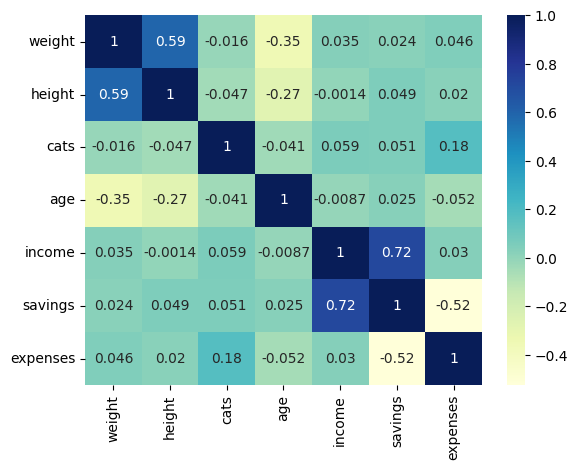

In [12]:
corr = data[quantitative_cols].corr()

dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [13]:
from scipy.stats import pearsonr

def test_dependencies(col1, col2, data=data):
    corr, p_value = pearsonr(data[col1], data[col2])
    return p_value


In [14]:
weight_height_dependency = test_dependencies('weight', 'height')
savings_income_dependency = test_dependencies('savings', 'income')
savings_expenses_dependency = test_dependencies('savings', 'expenses')
weight_age_dependency = test_dependencies('weight', 'age')
height_age_dependency = test_dependencies('height', 'age')

weight_height_dependency, savings_income_dependency, savings_expenses_dependency, weight_age_dependency, height_age_dependency

(np.float64(8.853941613399135e-44),
 np.float64(4.615995610331127e-72),
 np.float64(4.533281306490826e-33),
 np.float64(4.4554635126031374e-14),
 np.float64(7.57048617964083e-09))

We can see from the above results that some variables are correlated. For weight and height or for savings and income/expenses it is obvious,this is based in economics theory. What is more interesting is the relation between age and weight. The yonger you are the more you weight it seems. All the relations are statistically important after testing.

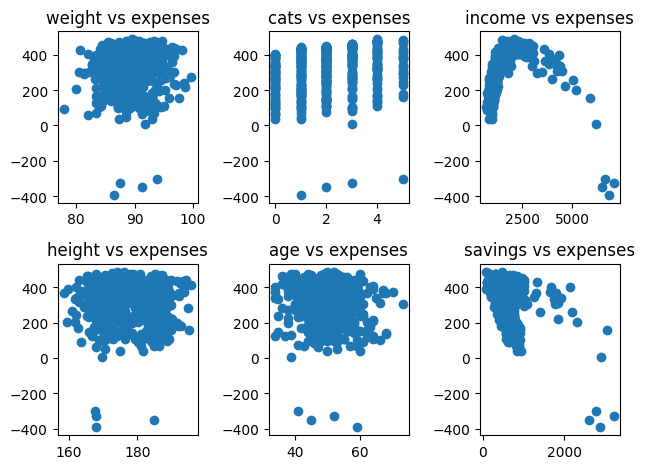

In [15]:
fig, ax = plt.subplots(2, 3)
i = 0
j = 0
for col in quantitative_cols:
    if col != 'expenses':
        ax[i, j].scatter(data[col], data['expenses'])
        ax[i, j].set_title(col+' vs expenses')
        i += 1
        if i > 1:
            i = 0
            j += 1

plt.tight_layout()

We can see no easy to detect relation betweem weight, height and age and expenses. What is clear is the fact that the more cats you have the more you spend. The relation between income and expenses seem to be non-linear. THere is a maximum point in the middle. With savings, the relation is there, but the form is a little complicated.

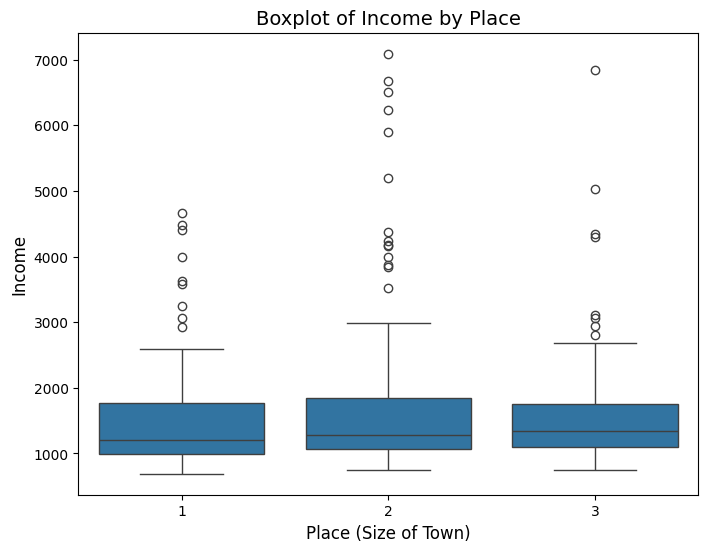

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='place', y='income')
plt.title('Boxplot of Income by Place', fontsize=14)
plt.xlabel('Place (Size of Town)', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['1', '2', '3'])
plt.show()

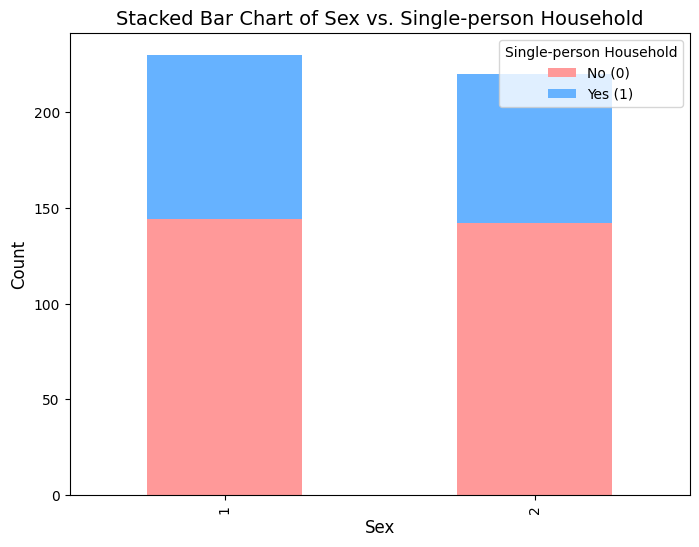

In [17]:
crosstab = pd.crosstab(data['sex'], data['single'])

crosstab.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(8, 6))
plt.title('Stacked Bar Chart of Sex vs. Single-person Household', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Single-person Household', labels=['No (0)', 'Yes (1)'])
plt.show()

In [18]:
data['wealth_class'] = 0
data.loc[data['income'] > data.income.quantile(0.25), 'wealth_class'] = 1
data.loc[data['income'] > data.income.quantile(0.75), 'wealth_class'] = 2
data.loc[data['income'] > data.income.quantile(0.9), 'wealth_class'] = 3

In [19]:
result = data.groupby('wealth_class')[['expenses']].agg([
    'mean',
    'std',
    ('q25', lambda x: np.percentile(x, 25)),
    ('q50', lambda x: np.percentile(x, 50)),
    ('q75', lambda x: np.percentile(x, 75)),
    'count',
])

result

expenses                                              
                    mean         std      q25      q50       q75 count
wealth_class                                                          
0             180.490000   72.818133  124.110  169.210  237.9500   113
1             341.325670   77.743135  290.375  352.945  395.9400   224
2             424.362353   34.799533  414.005  431.760  443.8175    68
3             294.569333  218.978376  301.950  368.700  408.7700    45

We can see what seems to contradictory to common sense: that at some point people stop spending money on food. The wealthiest group spend much less than two poorer ones. What is logical is the variance in this group, many outliers expenses. Interestingly, the lowest variance is not for the porrest but for the well-positioned.

## Task 5

### a

In [20]:
women_savings = data.loc[data['sex']==1, 'savings']
men_savings = data.loc[data['sex']==2, 'savings']

import scipy.stats as stats

t_stat, p_value = stats.ttest_ind(women_savings, men_savings, equal_var=False, alternative='less') #H_0 women save more

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.6502094472378092
P-value: 0.2579451345652113


There is no evidence to reject the null hypothesis that women earn more.

### b

In [21]:
data['expense_div_income'] = data['expenses'] / data['income']

model = sm.OLS(data['savings'], sm.add_constant(data[['expense_div_income']]))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                savings   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     654.7
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.17e-89
Time:                        11:07:50   Log-Likelihood:                -3149.2
No. Observations:                 450   AIC:                             6302.
Df Residuals:                     448   BIC:                             6311.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1585.2216     39.744     39.886      0.000    1507.113    1663.330
expense_div_income -4447.1743    173.810    -25.586      0.000   -4788.758   -4105.591
==============================================================================
Omnibus:                      159.267   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.681
Skew:                           1.420   Prob(JB):                    1.43e-194
Kurtosis:                       9.289   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### c

In [22]:
from scipy.stats import ttest_1samp

women_weights = data.loc[data['sex']==1, 'weight']

t_stat, p_value = ttest_1samp(women_weights, popmean=56, alternative='greater')

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 181.9430403811302
P-value: 5.690297645681283e-250


We have to reject the null hypothesis that the mean value is smaller than 56, which means, that the mean weight is bigger.

### d

We test whether wight is a normal distribution with mean 90 and std 3.6

In [23]:
from scipy.stats import chisquare, norm

weights = data['weight']

mean_weight = 90
std_weight = 3.6

num_bins = 10
bin_edges = np.linspace(weights.min(), weights.max(), num_bins + 1)

observed_freq, _ = np.histogram(weights, bins=bin_edges)

cdf_values = norm.cdf(bin_edges, loc=mean_weight, scale=std_weight)
expected_prob = np.diff(cdf_values)  # Probabilities for each bin
expected_freq = expected_prob * len(weights)

# Ensure the expected frequencies sum to the observed frequencies
expected_freq *= observed_freq.sum() / expected_freq.sum()

# Step 5: Perform the Chi-Square Test
chi_square_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

# Output results
print("Chi-Square Statistic:", chi_square_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data follows a normal distribution.")


Chi-Square Statistic: 19.639412294276845
p-value: 0.02027289635565944
Reject the null hypothesis: The data does not follow a normal distribution.


In [24]:
dummies = pd.get_dummies(data['place'], drop_first=True) * 1
dummies.columns = ['place_' + str(col) for col in dummies.columns]

df = data.drop(['place', 'wealth_class', 'expense_div_income'], axis=1).join(dummies)

In [25]:
y = df['expenses']
X = df.drop('expenses', axis=1)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     88.83
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           6.92e-99
Time:                        11:07:50   Log-Likelihood:                -2566.0
No. Observations:                 450   AIC:                             5154.
Df Residuals:                     439   BIC:                             5199.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -71.2740    161.791     -0.441      0.660    -389.254     246.706
weight         0.5084      1.353      0.376      0.707      -2.150       3.167
height         1.9770      0.730      2.707      0.007       0.542       3.412
sex          -15.1329     12.483     -1.212      0.226     -39.667       9.401
cats          18.1933      2.539      7.166      0.000      13.203      23.183
age            0.1855      0.544      0.341      0.733      -0.883       1.254
income         0.0831      0.009      9.481      0.000       0.066       0.100
savings       -0.3041      0.015    -19.627      0.000      -0.335      -0.274
single        48.9816     11.944      4.101      0.000      25.507      72.456
place_2       -4.6089      8.753     -0.527      0.599     -21.811      12.593
place_3        3.0926      9.675      0.320      0.749     -15.923      22.108
==============================================================================
Omnibus:                      193.277   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2633.113
Skew:                          -1.463   Prob(JB):                         0.00
Kurtosis:                      14.483   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_np = np.asarray(X)
y_np = np.asarray(y)

model = sm.OLS(y_np, X_np)
results = model.fit()
sm.stats.diagnostic.linear_reset(results, power=2, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=68.14635937637051, p-value=1.517994810558416e-16, df_denom=1>

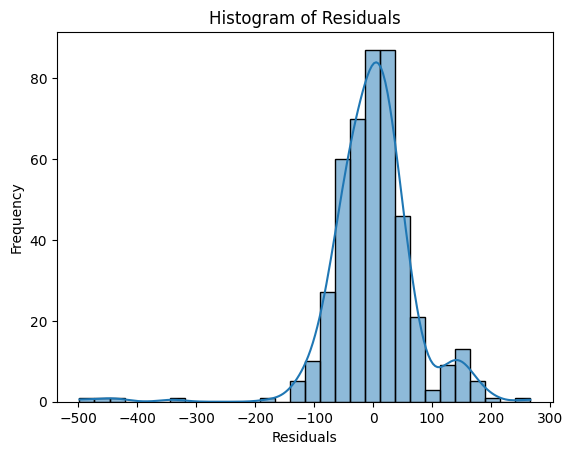

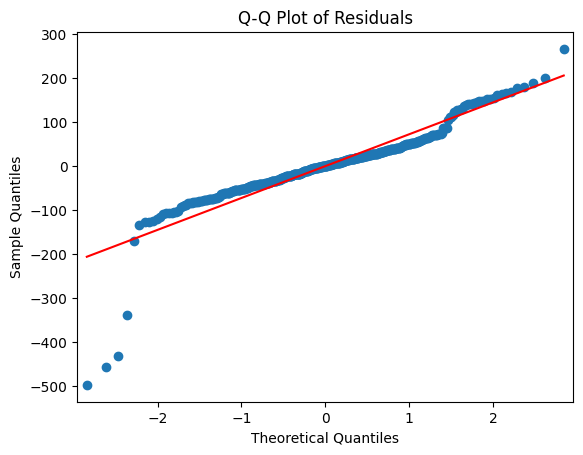

Shapiro-Wilk Test Statistic: 0.859787004381873, p-value: 1.2057498059179103e-19
Residuals do not appear to follow a normal distribution (reject H0).


In [27]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

# Plot Histogram of Residuals
resids = results.resid
sns.histplot(resids, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
qqplot(resids, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(resids)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}")

# Conclusion
if shapiro_p > 0.05:
    print("Residuals appear to follow a normal distribution (fail to reject H0).")
else:
    print("Residuals do not appear to follow a normal distribution (reject H0).")


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\unoci\AppData\Local\Temp\ipykernel_3596\4078273969.py:20: SyntaxWarning: invalid escape sequence '\s'
  plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


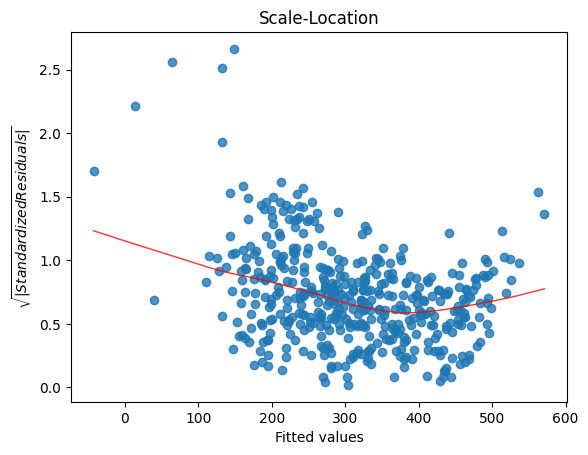

In [28]:
from statsmodels.graphics.gofplots import ProbPlot

# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

    feature          VIF
0     const  2187.516701
1    weight     1.978396
2    height     2.787977
3       sex     3.254002
4      cats     1.012013
5       age     1.156301
6    income     5.663402
7   savings     3.464390
8    single     2.761475
9   place_2     1.597357
10  place_3     1.592299


In [ ]:
df['const'] = 1

We start  the model from scratchas the model above has all the issues, many variables are not important. The first idea is to create a new key variable: disposable income as the difference between the income and savings. The logic behind it is that the expenses are a per cent of money we get for a month. 

In [1]:
df['disposable_income'] = df['income'] - df['savings']

plt.scatter(df['disposable_income'], df['expenses'])

NameError: name 'df' is not defined

It is clear that there is a relation between this new variable and expenses. However it is not linear. We can see a parabola in the picture, so we will use square of disposable income too for our model.

In [ ]:
df['disposable_income_2'] = (df['income'] - df['savings']) ** 2

In [ ]:
columns = [
    'const', 
    'disposable_income',
    'disposable_income_2',
]

In [ ]:
y = df['expenses']
X = df[columns]

model = sm.OLS(y, X)
results = model.fit()

results.summary()

In [ ]:
X_np = np.asarray(X)
y_np = np.asarray(y)

model = sm.OLS(y_np, X_np)
results = model.fit()
sm.stats.diagnostic.linear_reset(results, power=2, test_type='fitted')

In [ ]:
df['resid'] = model.resid

In [ ]:
df.groupby('place')['resid'].agg(lambda x: abs(x).mean())

In [ ]:
df.groupby('single')['resid'].agg(lambda x: abs(x).mean())

In [ ]:
df.groupby('cats')['resid'].agg(lambda x: abs(x).mean())

Model still doesn't work. We will check which variable can help. Grouping by qualitative variables allow to check their significance. We can see that the number of cats is important. So we add it to our model.

In [34]:
dummies = pd.get_dummies(df['cats']) * 1
dummies.columns = [str(col) + '_cats' for col in dummies.columns]
dummies.head()
df = df.join(dummies)

In [ ]:
columns = [
    'const', 
    'disposable_income',
    'disposable_income_2',
    '1_cats',
    '2_cats',
    '3_cats',
    '4_cats',
    '5_cats'
]


In [80]:
y = df['expenses']
X = df[columns]

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.044e+05
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:05:52   Log-Likelihood:                -1147.4
No. Observations:                 450   AIC:                             2311.
Df Residuals:                     442   BIC:                             2344.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.9402      0.498     21.978      0.000       9.962      11.919
disposable_income       0.4844      0.001    835.959      0.000       0.483       0.486
disposable_income_2    -0.0002   1.92e-07   -784.153      0.000      -0.000      -0.000
1_cats                 34.7407      0.497     69.922      0.000      33.764      35.717
2_cats                 40.2348      0.481     83.592      0.000      39.289      41.181
3_cats                 56.7311      0.538    105.529      0.000      55.675      57.788
4_cats                 84.0079      0.574    146.229      0.000      82.879      85.137
5_cats                 88.0627      0.790    111.539      0.000      86.511      89.614
==============================================================================
Omnibus:                        1.050   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                1.151
Skew:                           0.098   Prob(JB):                        0.562
Kurtosis:                       2.849   Cond. No.                     1.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X_np = np.asarray(X)
y_np = np.asarray(y)

model = sm.OLS(y_np, X_np)
results = model.fit()
sm.stats.diagnostic.linear_reset(results, power=2, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=1.6704950921790758, p-value=0.19619223407471387, df_denom=1>

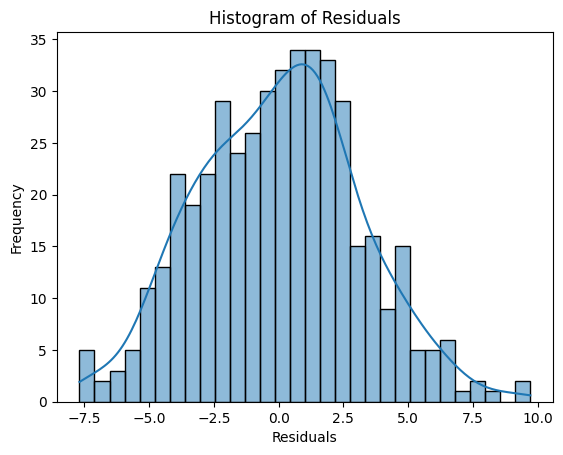

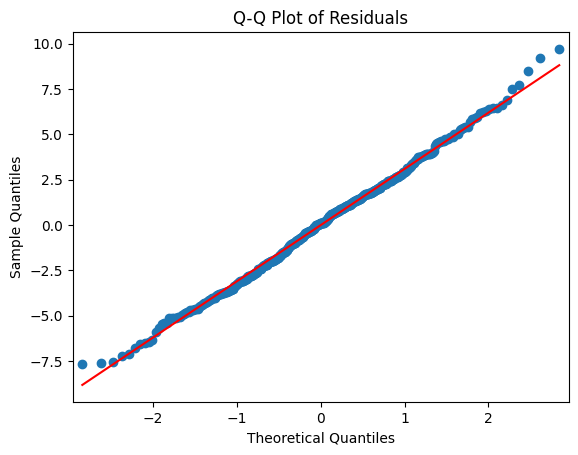

Shapiro-Wilk Test Statistic: 0.9964908363870816, p-value: 0.4324571763750744
Residuals appear to follow a normal distribution (fail to reject H0).


In [82]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

# Plot Histogram of Residuals
resids = results.resid
sns.histplot(resids, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
qqplot(resids, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(resids)
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}")

# Conclusion
if shapiro_p > 0.05:
    print("Residuals appear to follow a normal distribution (fail to reject H0).")
else:
    print("Residuals do not appear to follow a normal distribution (reject H0).")


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\unoci\AppData\Local\Temp\ipykernel_3596\4078273969.py:20: SyntaxWarning: invalid escape sequence '\s'
  plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


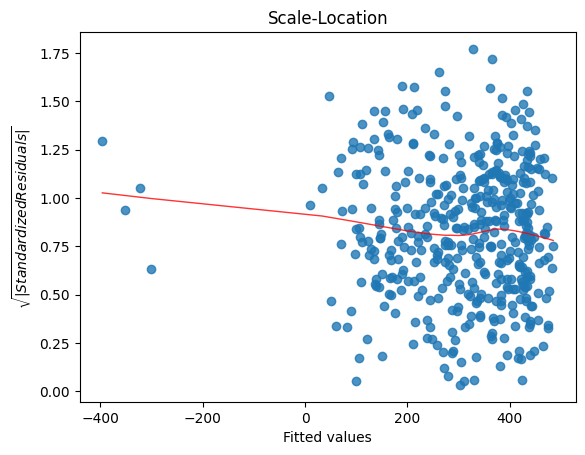

In [83]:
from statsmodels.graphics.gofplots import ProbPlot

# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

In [84]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)

In [85]:
p_value

np.float64(0.9209187528383264)

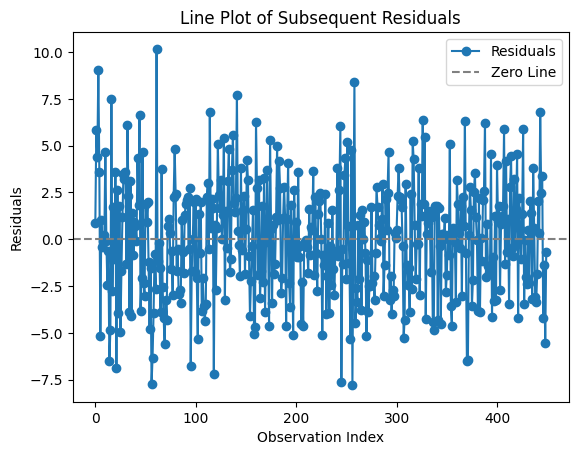

In [67]:
# put your code here
import matplotlib.pyplot as plt

# Assuming `results` contains the fitted regression model
residuals = results.resid  # Extract residuals

# Line plot of subsequent residuals
plt.plot(residuals, marker='o', linestyle='-', label='Residuals')
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')
plt.title("Line Plot of Subsequent Residuals")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.legend()
plt.show()



Now the model is almost perfect. The R^2 is 0.999 which cannot be beaten. On top of that, after testing we can see that the model is in correct form(RESET test, the residuals are nomally distributed (qq-plot) and there is no sign of heteroscedascity (we used Breusch-Pagan test plus some visualizations)).